# Advanced plotting examples with Matplotlib

The following examples are taken from the examples section at [matplotlib.org](http://matplotlib.org/gallery.html).

In [11]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

In [28]:
plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 200

## Plot some bars of random sizes and colors in a polar chart

This example based on [polar_bar_demo.py](http://matplotlib.org/examples/pie_and_polar_charts/polar_bar_demo.html) from the above gallery.

First, we define the number of bars, make our $\theta$ coordinate, and generate random radii and widths:

In [29]:
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

Next we create a polar bar chart with our random variables. We also use a colormap to color-code the bars by radius. 

At the end, we ``show()`` the result.

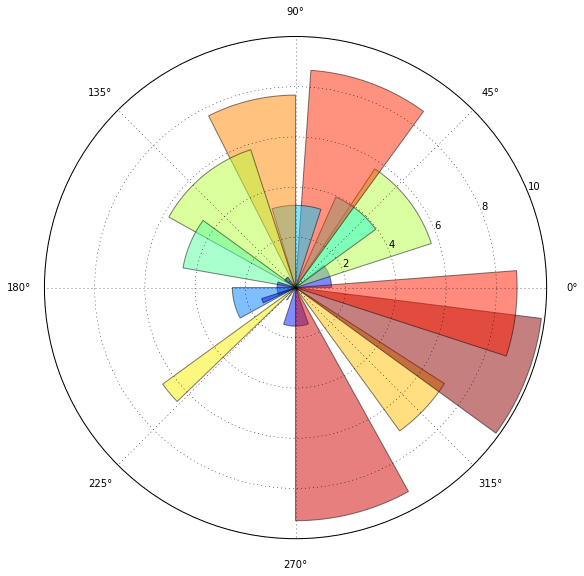

In [30]:
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()

## Display a vector field

This example is based on [quiver_demo.py](http://matplotlib.org/examples/pylab_examples/quiver_demo.html)

Here we are going to work through just one of the plots from that page. This type of plot is called a "quiver" plot (because it is full of arrows), and is useful for indicating the direction information when displaying a vector field.

The U,V field we will be displaying is $(U,V) = (\cos(x) ,\sin(y) )$ on $[0,2\pi ]\times [0,2\pi]$

In [31]:
from numpy import meshgrid, arange, cos, sin, pi
X,Y = meshgrid( arange(0,2*pi,.2),arange(0,2*pi,.2) )
U = cos(X)
V = sin(Y)

In [32]:
Y

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  0.2, ...,  0.2,  0.2,  0.2],
       [ 0.4,  0.4,  0.4, ...,  0.4,  0.4,  0.4],
       ..., 
       [ 5.8,  5.8,  5.8, ...,  5.8,  5.8,  5.8],
       [ 6. ,  6. ,  6. , ...,  6. ,  6. ,  6. ],
       [ 6.2,  6.2,  6.2, ...,  6.2,  6.2,  6.2]])

To reduce the number of arrows we plot a ``quiver`` of every third data point in our mesh.

``quiverkey`` lets us put a symbol marker label, and we can even use basic LaTeX notation.

We also make a normal plot on the same chart, using black dots, to indicate the actual location of each data point in our mesh.

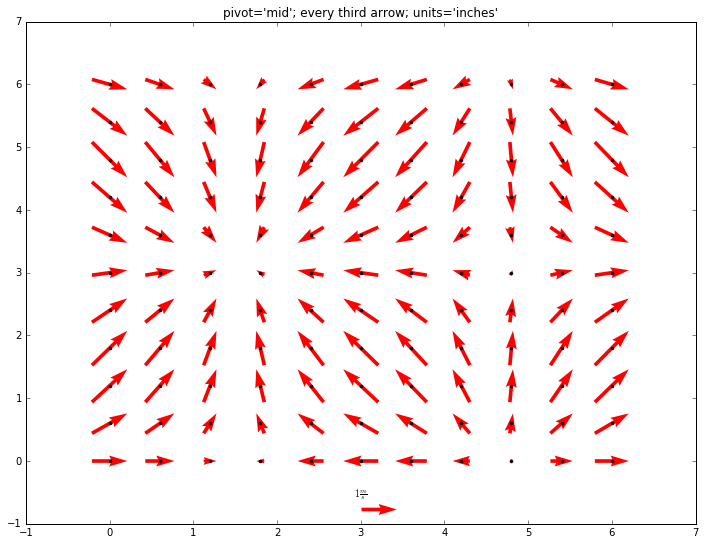

In [33]:
Q = plt.quiver( X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
            pivot='mid', color='r', units='inches' )
qk = plt.quiverkey(Q, 0.5, 0.03, 1, r'$1 \frac{m}{s}$', fontproperties={'size': 'medium'})
plt.plot( X[::3, ::3], Y[::3, ::3], 'k.')
plt.axis([-1, 7, -1, 7])
plt.title("pivot='mid'; every third arrow; units='inches'")

## Plotting geographic information with Cartopy

First we load some additional modules:

In [7]:
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

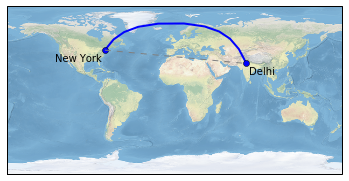

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

In [9]:
import cartopy.feature

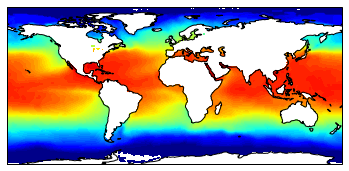

In [10]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()


Basemap is deprecated in favor of Cartopy - below included for reference only

Plotting geographic information with Basemap

This example is based on ``plotsst.py`` from the [Basemap examples page](http://matplotlib.org/basemap/users/examples.html).

First we load some additional modules:

In [8]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
from datetime import datetime

A simple example: plot a world map with the current day/night shaded

<IPython.core.display.Javascript object>


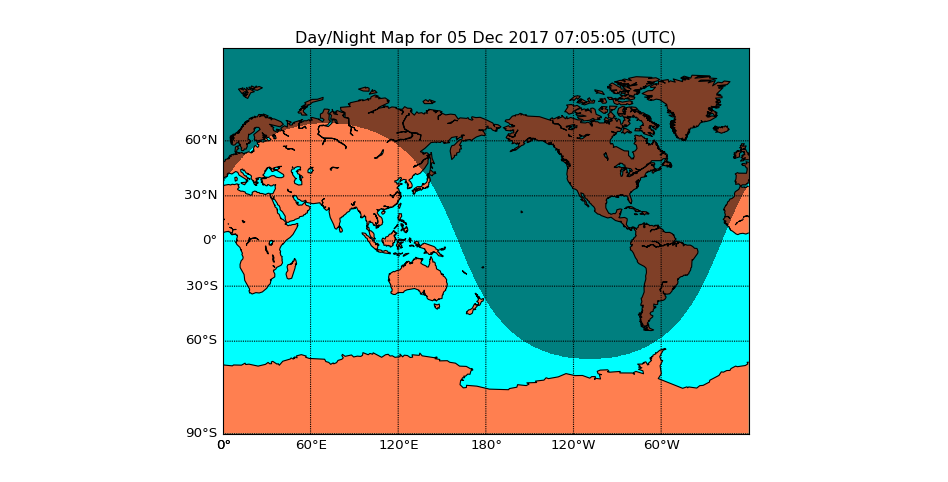

/panfs/roc/itascasoft/python3/3.4-conda/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


In [9]:
# miller projection 
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the 
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

Now for a more complex example.

Here we read in the sea surface temps and ice from NOAA. See how easy it is to fetch external datasets!

In [10]:
date = datetime( 2017,10,1,0) # date to plot.
# open dataset.
dataset = Dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2/sst.wkmean.1990-present.nc')
icedata = Dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2/icec.wkmean.1990-present.nc')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.

Create some variables. Read ``sst`` and ``ice`` from the dataset we just downloaded, and make a grid of latitude and longitude.

In [11]:
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = icedata.variables['icec'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)

Some fiddling since the format of the land and ice masks changed since we wrote this example.

In [12]:
land = ice.copy()
land.data[:] = 0
land.mask = ~land.mask[:]
ice.mask[np.where(ice.data == 0)] = True

Next we set up a figure and a map projection

<IPython.core.display.Javascript object>


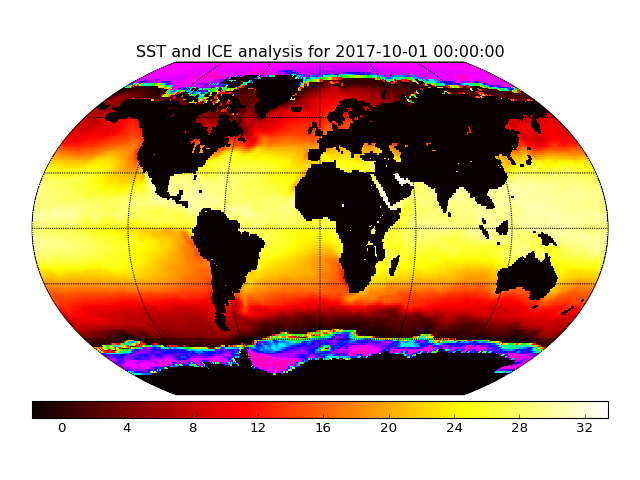

In [13]:
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance without coastlines
m = Basemap(projection='kav7',lon_0=0,resolution=None)
m.drawmapboundary(fill_color='0.3')

Finally, we plot the data onto our world map.

In [14]:
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.hot,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_rainbow,latlon=True)
im3 = m.pcolormesh(lons,lats,land,shading='flat',cmap=plt.cm.hot,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
plt.title('SST and ICE analysis for %s'%date)
plt.show()